# **Numerical Image Processing Project - SUSAN Corner Detector**

Realized by: Diandra Gherman and Tudor Mircică

Library import

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Import and display gray scale image 

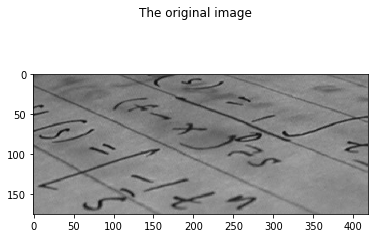

In [ ]:
img = cv2.imread('text.PNG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = gray.astype(np.float64)

plt.figure()
plt.imshow(img)
plt.suptitle("The original image")
plt.show()

Creating a circular mask of 57 pixels ( 9 x 9 square matrix with 0 around corners) 

In [ ]:
M= np.ones((9,9))

#line 1
M[0,0]=0
M[0,1]=0
M[0,2]=0
M[0,6]=0
M[0,7]=0
M[0,8]=0

#line 2
M[1,0]=0
M[1,1]=0
M[1,7]=0
M[1,8]=0

#line 3
M[2,0]=0
M[2,8]=0

#line 7
M[6,0]=0
M[6,8]=0

#line 8
M[7,0]=0
M[7,1]=0
M[7,7]=0
M[7,8]=0

#line 9
M[8,0]=0
M[8,1]=0
M[8,2]=0
M[8,6]=0
M[8,7]=0
M[8,8]=0

print("The SUSAN mask: \n")
for r in M:
    print ('  '.join(map(str, r)))


The SUSAN mask: 

0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0
0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0
1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0
0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0


Define the geometric threshold

In [ ]:
#size of the mask
s = np.sum([M==1])
print("Size of mask:",s)
g = int(s/2);
print("Value of the geometrical threshold:", g)

Size of mask: 57
Value of the geometrical threshold: 28


Set the value of the threshold

In [ ]:
t = 55

Implementation of the SUSAN corner detection algorithm

In [ ]:
d = int((M.shape[0]-1)/2)
h = int(len(gray) - 2*d)
w = int(len(gray[0]) - 2*d)
#calculating the computation region that is placed under the mask
for i in range(d,h):
  for j in range(d,w):
    ir=np.array(gray[i-d:i+d+1, j-d:j+d+1])   
    for p in range(0, ir.shape[0]):
      for q in range(0, ir.shape[1]):
        ir[p][q] = ir[p][q] * M[p][q]  

    ir0 = gray[i][j]
    c = 0
    for p in range(0, ir.shape[0]):
      for q in range(0, ir.shape[1]):
        if abs(ir[p][q]-ir0) < t:
          c = c + 1
    if c <= g:
      c = g-c
    else:
      c = 0
    if c != 0:
      img[i][j] = [255,0,255]      
            
print("Size of the computation region", ir.shape)

Size of the computation region (9, 9)


The result of the algorithm

Size of original gray scale image: (175, 419)


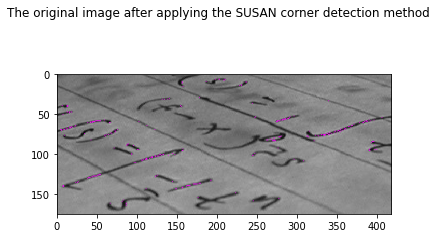

In [ ]:
plt.figure()
plt.imshow(img)
plt.suptitle("The original image after applying the SUSAN corner detection method")
print("Size of original gray scale image:", gray.shape)
plt.show()